The term contrast refers to the amount of color or grayscale differentiation that exists between various image features in both analog and digital images. Images having a higher contrast level generally display a greater degree of color or grayscale variation than those of lower contrast. This interactive tutorial explores the wide range of adjustment that is possible in digital image contrast manipulation, and how contrast variations affect the final appearance of the image.


In [3]:
import os
import os.path
import sys
import numpy as np
import pandas as pd
import imageio
from scipy import ndimage
import matplotlib.pylab as plt
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_mean, threshold_otsu


pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None
np.set_printoptions(linewidth=1000)
np.core.arrayprint._line_width = 1000
pd.set_option("display.max_columns", 10000)
pd.set_option("display.width", 10000)


image_dir = "G:\\Repos\\GT\\ISYE8803\\HW2"

imglkp = {
    "coin"  :os.path.join(image_dir, "coin.png"),
    "camera":os.path.join(image_dir, "Camera.jpg"),
    "cs"    :os.path.join(image_dir, "CS.png"),
    "eye"   :os.path.join(image_dir, "eye.jpg"),
    "lotus" :os.path.join(image_dir, "lotus-flower.jpg"),
    "quiz"  :os.path.join(image_dir, "quiz.png"),
    "tiger" :os.path.join(image_dir, "tiger.jpg"),
    "valley":os.path.join(image_dir, "valley.jpg"),
    }


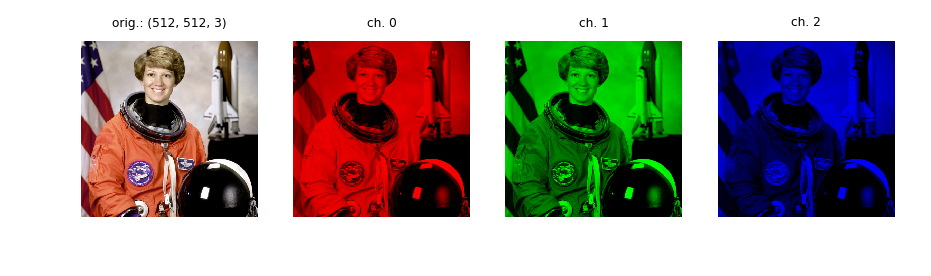

In [3]:
"""
Each image pixel is represented by three integer: The RGB value of its colour.
Splitting the image into separate colour components is just a matter of 
pulling out the correct slice of the image array.

    http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
    
"""
img = data.astronaut()

fig, ax = plt.subplots(ncols=4, dpi=175)

# Original image.
ax[0].imshow(img)
ax[0].set_title(
    "orig.: {}".format(
        "(" + ", ".join([str(i) for i in img.shape]) + ")"
        ), size=5
    )
ax[0].set_axis_off()

for channel in range(3):
    img_arr = np.zeros(img.shape, dtype="uint8")
    img_arr[:, :, channel] = img[:, :, channel]
    ax[channel + 1].imshow(img_arr)
    ax[channel + 1].set_title("ch. {}".format(channel), size=5)
    ax[channel + 1].set_axis_off()


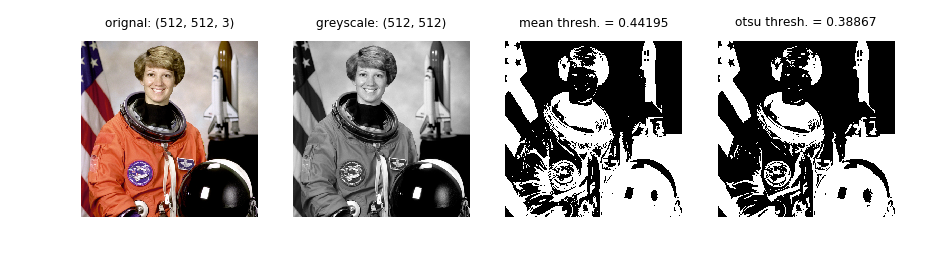

In [4]:
"""
Show image in original color, greyscale and binary (black-white).
The binary image threshold is determined using the mean and otsu 
filters. 

The formula used to convert color to greyscale images is:

        Y = 0.2125 R + 0.7154 G + 0.0721 B
        
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html

"""
img0 = data.astronaut()
img1 = rgb2gray(img0)

fig, ax = plt.subplots(ncols=4, dpi=175)

# Using threshold_mean.
thresh0 = threshold_mean(img1)
img2 = img1 > thresh0

# Using threshold_otsu.
thresh1 = threshold_otsu(img1)
img3 = img1 > thresh1


dimages = {
    "original":{
        "index":0, 
        "image":img0, 
        "cmap" :None,
        "title":"orignal: {}".format("(" + ", ".join([str(i) for i in img0.shape]) + ")"), 
        },
    "greyscale":{
        "index":1, 
        "image":img1, 
        "cmap" :plt.cm.gray,
        "title":"greyscale: {}".format("(" + ", ".join([str(i) for i in img1.shape]) + ")"),
        },
    "binary0":{
        "index":2, 
        "image":img2, 
        "cmap" :"binary",
        "title":"mean thresh. = {:.5f}".format(thresh0),
        },
     "binary1":{
        "index":3, 
        "image":img3, 
        "cmap" :"binary",
        "title":"otsu thresh. = {:.5f}".format(thresh1),
        },
    }

for key_ in dimages.keys():
    
    imglkp = dimages[key_]
    index  = imglkp["index"]
    img    = imglkp["image"]
    cmap   = imglkp["cmap"]
    title  = imglkp["title"]
    
    ax[index].imshow(img, cmap=cmap)
    ax[index].set_title(title, size=5)
    ax[index].set_axis_off()
 

In [ ]:
img =  rgb2gray(imread(fname=imglkp["coin"])

plt.imshow(img, cmap=plt.cm.gray)

# image = rgb2gray(data.astronaut())
# plt.imshow(image)

# # show histogram
# plt.hist(image.ravel(), bins=32)
# plt.show()


                
from skimage.filters import threshold_mean


image = data.camera()
thresh = threshold_mean(image)
binary = image > thresh

In [ ]:
# Flip an image.
flipped = img[:, ::-1]


In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

<Figure size 800x400 with 2 Axes>